# "Monte Carlo Integration in Python"


- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Python]
- image: images/monte_logo.gif

# 몬테 카를로 적분(Monte Carlo Integration)

# Problem 

**Find $\int_0^1 (x + sin(\pi x))\,dx$.**

## Solution I - Analytic Sol

$\int_0^1 (x + sin(\pi x))\,dx = \left[\cfrac{1}{2} x^2-\cfrac{1}{\pi}cos(\pi x)\right]_0^1 = \cfrac{1}{2} + \cfrac{1}{\pi} + \cfrac{1}{\pi} = \cfrac{1}{2}+\cfrac{2}{\pi}$

## Solution II - Monte Carlo Integration in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

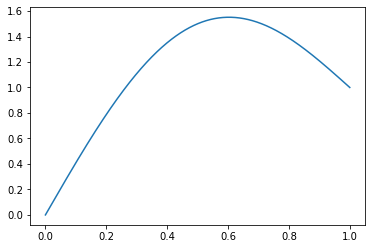

In [163]:
def function(x):
    return x + np.sin(np.pi*x)

x = np.linspace(0, 1, 10000)
y = [function(x) for x in x]
plt.plot(x, y)
plt.show()

![](image/monte_1.png)

![](image/monte_2.png)

In [142]:
def function(x): #함수 정의
    return x + np.sin(np.pi*x)

N = int(5000)  # Random Sampling 시행 횟수

W = 1  # 사각형의 가로 길이
H = 1.6  #사각형의 세로 길이

X = np.random.random(N)   # 0~1까지의 x 좌표 Random Sampling을 N번 시행
Y = H * np.random.random(N) # 그래프상 최솟값 ~ 최댓값까지의 y 좌표 Randon Sampling을 N번 시행
F = function(X) # Random Sampling으로 구한 X값에 따른 함숫값

in_or_out = Y < F  # Y < F (IN)이면 True, Y > F (OUT)이면 False
A = H * W * np.sum(in_or_out) / N # 영역 S의 넓이

print(A)

1.1302400000000001


### Visualization

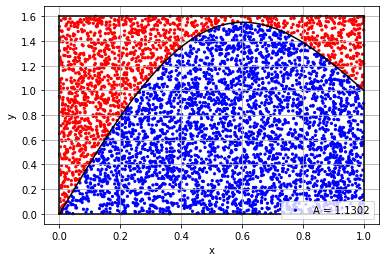

In [169]:
color = list(map(lambda x: 'blue' if x == True else 'red', in_or_out)) #색 정하기

x = np.linspace(0, 1, 10000) #함수 그리기
y = [function(x) for x in x]
plt.plot(x, y, color = 'black')
               
plt.scatter(X, Y, color = color, s=5, label='A = {}'.format(np.round(A, 4)))
plt.legend(loc = 'lower right') #범례(legend) 위치
               
plt.plot([0, W], [0, 0], color='black') # 사각형 영역
plt.plot([W, W], [0, H], color='black')
plt.plot([0, W], [H, H], color='black')
plt.plot([0, 0], [0, H], color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()